# Visualisation Binary results

In this section I show the results for: Mutual Information, Maximal Leakage and (Maximal) Alpha-Leakage for the binary data experiment

In [114]:
## Extra needed packages:
# Pandas
# Matplotlib

# !pip install pandas matplotlib

In [229]:
results_path = "results/correct_binary_results/"

In [235]:
import json
import os

# Not the cleanest code, but works for now...
UNCORRELATED = 'uncorrelated'
CORRELATED = 'correlated'
RANDOM = 'random'
    
file_names_dict = {
    'correlated_mi': [],
    'correlated_maxl': [],
    'correlated_alpha': [],
    
    'uncorrelated_mi': [],
    'uncorrelated_maxl': [],
    'uncorrelated_alpha': [],
    
    'random_mi': [],
    'random_maxl': [],
    'random_alpha': [],
}

def add_to_list(file_name, data_type):
    file_path = os.path.join(results_path, file_name)
    with open(file_path) as json_file:
        if file.endswith('maxl.json'):
            file_names_dict[data_type + '_maxl'].append(json.load(json_file))
        elif file.endswith('alpha.json'):
            file_names_dict[data_type + '_alpha'].append(json.load(json_file))
        else:
            file_names_dict[data_type + '_mi'].append(json.load(json_file))


print("Loading to dictionary...")
for file in os.listdir(results_path):
    if UNCORRELATED in file:
        add_to_list(file, UNCORRELATED)
    elif RANDOM in file:
        add_to_list(file, RANDOM)
    else:
        add_to_list(file, CORRELATED)
print("Loading complete.")

Loading to dictionary...
Loading complete.


In [231]:
import numpy as np

def get_deltas_lambdas(file_name):
    deltas = list(file_names_dict[file_name][0].keys())
    lambdas = list(file_names_dict[file_name][0][deltas[0]].keys())
    return (deltas, lambdas)

def get_stats_for_file(file_name):
    '''
    Only works for Maximal Leakage and Mutual Information result sets. Alpha-Leakage needs other approach.
    '''
    (deltas,lambdas) = get_deltas_lambdas(file_name)
    privacy_leakage_train = []
    public_leakage_train = []
    distortion_train = []
    
    privacy_leakage_test = []
    public_leakage_test = []
    distortion_test = []
    
    file_dict = file_names_dict[file_name][0]
    for delta in deltas:
        privacy_leakage_train.append(file_dict[delta][lambdas[0]]['train']['E[MI_ZX]'])
        public_leakage_train.append(file_dict[delta][lambdas[0]]['train']['E[MI_ZY]'])
        distortion_train.append(file_dict[delta][lambdas[0]]['train']['E[hamm(x,y)]'])
        
        privacy_leakage_test.append(file_dict[delta][lambdas[0]]['test']['E[MI_ZX]'])
        public_leakage_test.append(file_dict[delta][lambdas[0]]['test']['E[MI_ZY]'])
        distortion_test.append(file_dict[delta][lambdas[0]]['test']['E[hamm(x,y)]'])
    
    deltas = np.around(np.array(deltas, dtype=np.double), 2)
    
    privacy_leakage_train = np.array(privacy_leakage_train)
    public_leakage_train = np.array(public_leakage_train)
    distortion_train = np.array(distortion_train)
    
    privacy_leakage_test = np.array(privacy_leakage_test)
    privacy_leakage_test = np.array(public_leakage_test)
    public_leakage_test = np.array(distortion_test)
    
    return (
        np.c_[deltas, privacy_leakage_train, public_leakage_train, distortion_train],
        np.c_[deltas, privacy_leakage_test, public_leakage_test, distortion_test]
    )
    
(train, test) = get_stats_for_file('correlated_mi')

# Convert to pandas

In [108]:
import pandas as pd

def convert_to_pandas(nd_array):
    return pd.DataFrame(data=nd_array, columns=['delta','E[MI_ZX]', 'E[MI_ZY]', 'E[hamm(x,y)]'])

convert_to_pandas(train)

,delta,E[MI_ZX],E[MI_ZY],"E[hamm(x,y)]"
0,1.0,0.000212,0.000212,0.507500
1,0.9,0.000062,0.000062,0.502625
2,0.8,0.000016,0.000016,0.502250
3,0.7,0.000138,0.000138,0.506000
4,0.6,0.000010,0.000010,0.497750
5,0.5,0.000013,0.000013,0.497875
6,0.4,0.027403,0.027403,0.402875
7,0.3,0.122419,0.122419,0.297000
8,0.2,0.275814,0.275814,0.201125
9,0.1,0.494598,0.494598,0.111875


# Start plotting

In [205]:
######### Mutual Information

(train_correlated_mi, test_correlated_mi) = get_stats_per_delta('correlated_mi')
(train_correlated_mi_df, test_correlated_mi_df) = (convert_to_pandas(train_correlated_mi), convert_to_pandas(test_correlated_mi))

(train_uncorrelated_mi, test_uncorrelated_mi) = get_stats_per_delta('uncorrelated_mi')
(train_uncorrelated_mi_df, test_uncorrelated_mi_df) = (convert_to_pandas(train_uncorrelated_mi), convert_to_pandas(test_uncorrelated_mi))

(train_random_mi, test_random_mi) = get_stats_per_delta('random_mi')
(train_random_mi_df, test_random_mi_df) = (convert_to_pandas(train_random_mi), convert_to_pandas(test_random_mi))

######### Maximal Leakage

(train_correlated_maxl, test_correlated_maxl) = get_stats_per_delta('correlated_maxl')
(train_correlated_maxl_df, test_correlated_maxl_df) = (convert_to_pandas(train_correlated_maxl), convert_to_pandas(test_correlated_maxl))

(train_uncorrelated_maxl, test_uncorrelated_maxl) = get_stats_per_delta('uncorrelated_maxl')
(train_uncorrelated_maxl_df, test_uncorrelated_maxl_df) = (convert_to_pandas(train_uncorrelated_maxl), convert_to_pandas(test_uncorrelated_maxl))

(train_random_maxl, test_random_maxl) = get_stats_per_delta('random_maxl')
(train_random_maxl_df, test_random_maxl_df) = (convert_to_pandas(train_random_maxl), convert_to_pandas(test_random_maxl))

In [110]:
train_correlated_mi_df

,delta,E[MI_ZX],E[MI_ZY],"E[hamm(x,y)]"
0,1.0,0.000212,0.000212,0.507500
1,0.9,0.000062,0.000062,0.502625
2,0.8,0.000016,0.000016,0.502250
3,0.7,0.000138,0.000138,0.506000
4,0.6,0.000010,0.000010,0.497750
5,0.5,0.000013,0.000013,0.497875
6,0.4,0.027403,0.027403,0.402875
7,0.3,0.122419,0.122419,0.297000
8,0.2,0.275814,0.275814,0.201125
9,0.1,0.494598,0.494598,0.111875


## We create two plots for two purposes
- The first plot is the plot of I(X;Z) and hamm(Y,Z). This shows the tradeoff between privacy and utility
- The second plot is the plot of np.linspace(1,0,11). This shows to what extend the network can meet with the set constraints. Ideally we get a straight linear map.

In [221]:
import matplotlib.pyplot as plt

def compute_constraint_error(df):
    y = df['delta'].to_numpy()
    yhat = df['E[hamm(x,y)]'].to_numpy()
    
    return (y-yhat).mean()

def plot_privacy_utility_tradeoff(axs, df, name, train_or_tesst):
    x = df['E[hamm(x,y)]']
    y = df['E[MI_ZX]']
    z = df['delta']

    axs.plot(z,y, label='I(X;Z)_' + train_or_tesst)
    axs.plot(z,x, label='hamm(Y;Z)_' + train_or_tesst)
    axs.scatter(z,y)
    axs.scatter(z,x)
    axs.set_xlabel('delta-constraint')
    axs.set_title('{} data'.format(name))
    axs.legend()

Constraint error correlated: 0.12395454545454547
Constraint error uncorrelated: 0.13481818181818184
Constraint error random: 0.21645454545454548


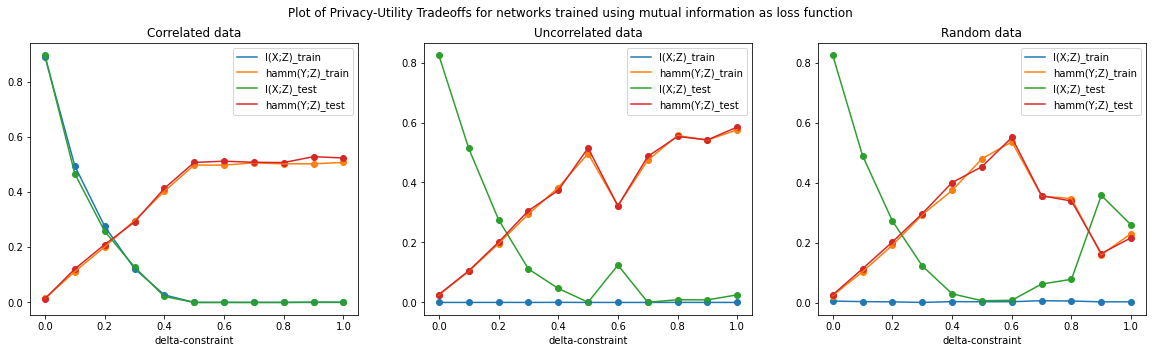

In [224]:
fig, axs = plt.subplots(1, 3)
fig.suptitle('Plot of Privacy-Utility Tradeoffs for networks trained using mutual information as loss function')
fig.set_figheight(5)
fig.set_figwidth(20)

plot_privacy_utility_tradeoff(axs[0], train_correlated_mi_df, 'Correlated', 'train')
plot_privacy_utility_tradeoff(axs[1], train_uncorrelated_mi_df, 'Uncorrelated', 'train')
plot_privacy_utility_tradeoff(axs[2], train_random_mi_df, 'Random', 'train')

plot_privacy_utility_tradeoff(axs[0], test_correlated_mi_df, 'Correlated', 'test')
plot_privacy_utility_tradeoff(axs[1], test_uncorrelated_mi_df, 'Uncorrelated', 'test')
plot_privacy_utility_tradeoff(axs[2], test_random_mi_df, 'Random', 'test')

fig.savefig('binary_mutual_information_plots.png')
print('Constraint error correlated: {}'.format(compute_constraint_error(test_correlated_mi_df)))
print('Constraint error uncorrelated: {}'.format(compute_constraint_error(test_uncorrelated_mi_df)))
print('Constraint error random: {}'.format(compute_constraint_error(test_random_mi_df)))

Constraint error correlated: 0.2340909090909091
Constraint error uncorrelated: 0.2096818181818182
Constraint error random: 0.20768181818181822


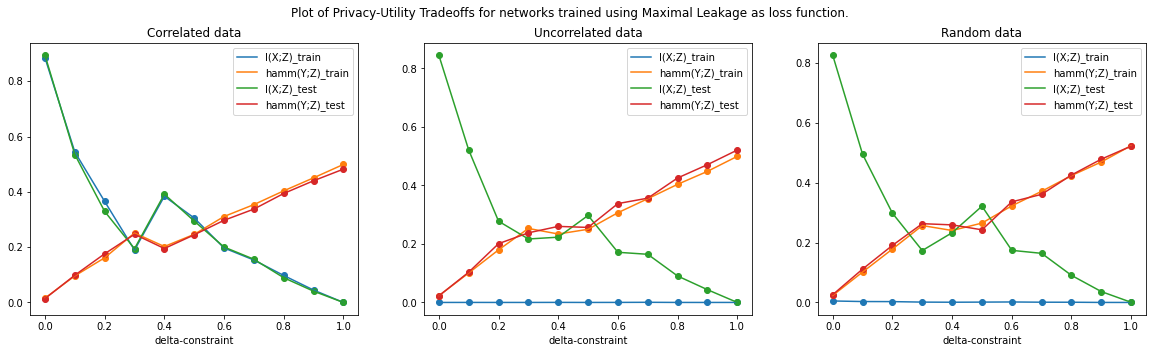

In [225]:
fig, axs = plt.subplots(1, 3)
fig.suptitle('Plot of Privacy-Utility Tradeoffs for networks trained using Maximal Leakage as loss function.')
fig.set_figheight(5)
fig.set_figwidth(20)

plot_privacy_utility_tradeoff(axs[0], train_correlated_maxl_df, 'Correlated', 'train')
plot_privacy_utility_tradeoff(axs[1], train_uncorrelated_maxl_df, 'Uncorrelated', 'train')
plot_privacy_utility_tradeoff(axs[2], train_random_maxl_df, 'Random', 'train')


plot_privacy_utility_tradeoff(axs[0], test_correlated_maxl_df, 'Correlated', 'test')
plot_privacy_utility_tradeoff(axs[1], test_uncorrelated_maxl_df, 'Uncorrelated', 'test')
plot_privacy_utility_tradeoff(axs[2], test_random_maxl_df, 'Random', 'test')

fig.savefig('binary_maximal_leakage_plots.png')
print('Constraint error correlated: {}'.format(compute_constraint_error(test_correlated_maxl_df)))
print('Constraint error uncorrelated: {}'.format(compute_constraint_error(test_uncorrelated_maxl_df)))
print('Constraint error random: {}'.format(compute_constraint_error(test_random_maxl_df)))

# Comparing Maximal Leakage and Mutual Information

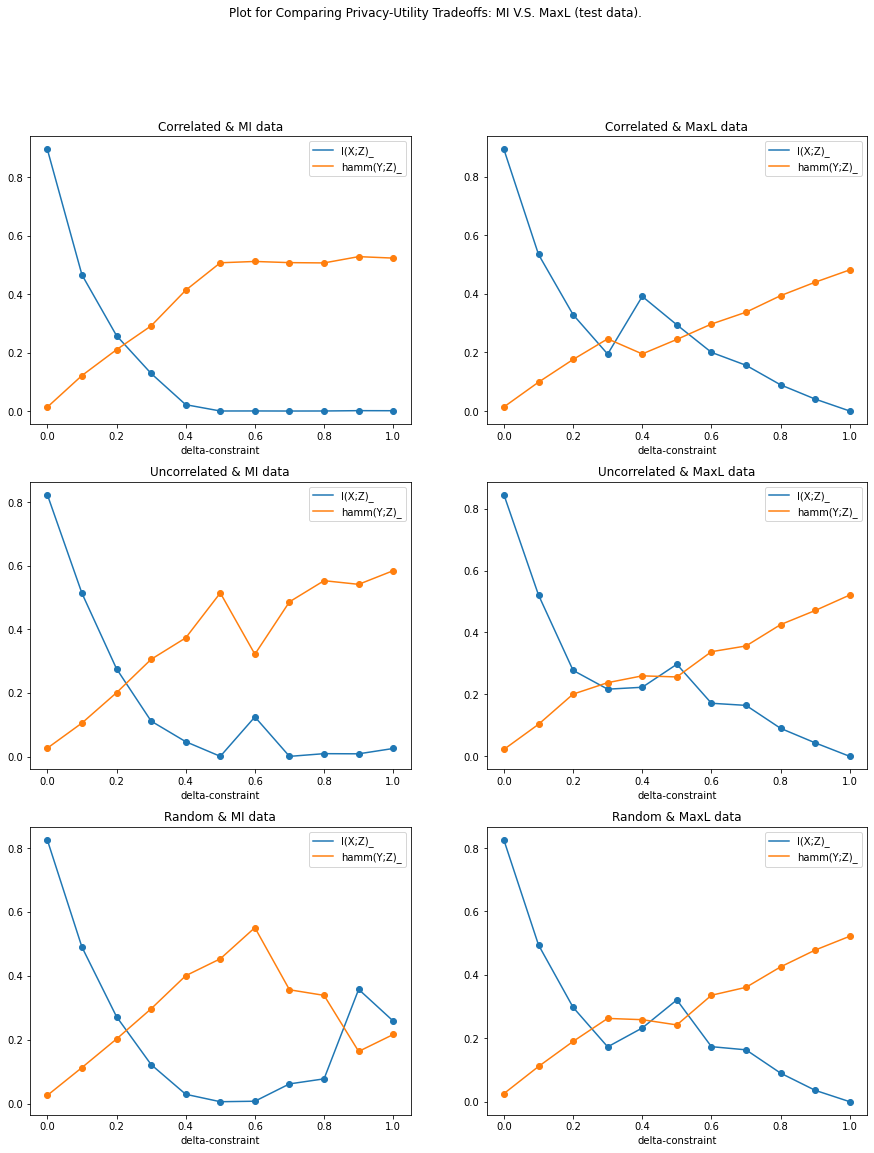

In [228]:
fig, axs = plt.subplots(3, 2)
fig.suptitle('Plot for Comparing Privacy-Utility Tradeoffs: MI V.S. MaxL (test data).')
fig.set_figheight(18)
fig.set_figwidth(15)

plot_privacy_utility_tradeoff(axs[0,0], test_correlated_mi_df, 'Correlated & MI', '')
plot_privacy_utility_tradeoff(axs[0,1], test_correlated_maxl_df, 'Correlated & MaxL', '')

plot_privacy_utility_tradeoff(axs[1,0], test_uncorrelated_mi_df, 'Uncorrelated & MI', '')
plot_privacy_utility_tradeoff(axs[1,1], test_uncorrelated_maxl_df, 'Uncorrelated & MaxL', '')

plot_privacy_utility_tradeoff(axs[2,0], test_random_mi_df, 'Random & MI', '')
plot_privacy_utility_tradeoff(axs[2,1], test_random_maxl_df, 'Random & MaxL', '')

fig.savefig('binary_comparing_maxl_mi_plots.png')

# Alpha files

In [378]:
def get_alphas_deltas_lambdas_for_file(file_name):
    alphas = list(file_names_dict[file_name][0].keys())
    deltas = list(file_names_dict[file_name][0][alphas[0]].keys())
    lambdas = list(file_names_dict[file_name][0][alphas[0]][deltas[0]].keys())
    return (alphas, deltas, lambdas)

def get_stats_for_alpha_file(file_name):
    '''
    Only works for Maximal Leakage and Mutual Information result sets. Alpha-Leakage needs other approach.
    '''
    (alphas,deltas,lambdas) = get_alphas_deltas_lambdas_for_file(file_name)
    
    privacy_leakage_train = []
    public_leakage_train = []
    distortion_train = []
    
    privacy_leakage_test = []
    public_leakage_test = []
    distortion_test = []
    
    alphas_2 = []
    deltas_2 = [] 
    
    file_dict = file_names_dict[file_name][0]
    for a in alphas:
        for delta in deltas:
            privacy_leakage_train.append(file_dict[a][delta][lambdas[0]]['train']['E[MI_ZX]'])
            public_leakage_train.append(file_dict[a][delta][lambdas[0]]['train']['E[MI_ZY]'])
            distortion_train.append(file_dict[a][delta][lambdas[0]]['train']['E[hamm(x,y)]'])

            privacy_leakage_test.append(file_dict[a][delta][lambdas[0]]['test']['E[MI_ZX]'])
            public_leakage_test.append(file_dict[a][delta][lambdas[0]]['test']['E[MI_ZY]'])
            distortion_test.append(file_dict[a][delta][lambdas[0]]['test']['E[hamm(x,y)]'])
            alphas_2.append(a)
            deltas_2.append(delta)
    
    alphas = np.array(alphas_2)
    deltas = np.around(np.array(deltas_2, dtype=np.double), 2)    
    
    privacy_leakage_train = np.array(privacy_leakage_train).round(4)
    public_leakage_train = np.array(public_leakage_train).round(4)
    distortion_train = np.array(distortion_train).round(4)
    
    privacy_leakage_test = np.array(privacy_leakage_test).round(4)
    privacy_leakage_test = np.array(public_leakage_test).round(4)
    public_leakage_test = np.array(distortion_test).round(4)
    
    return (
        np.c_[alphas, deltas, privacy_leakage_train, public_leakage_train, distortion_train],
        np.c_[alphas, deltas, privacy_leakage_test, public_leakage_test, distortion_test]
    )

def convert_to_pandas_alpha_files(nd_array):
    return pd.DataFrame(data=nd_array, 
                        columns=['alpha', 'delta','E[MI_ZX]', 'E[MI_ZY]', 'E[hamm(x,y)]'],
                        dtype=np.float32)

(train,test) = get_stats_for_alpha_file('correlated_alpha')
convert_to_pandas_alpha_files(train)

,alpha,delta,E[MI_ZX],E[MI_ZY],"E[hamm(x,y)]"
0,2.0,1.0,0.0001,0.0001,0.4876
1,2.0,0.9,0.0426,0.0426,0.4440
2,2.0,0.8,0.0977,0.0977,0.3959
3,2.0,0.7,0.1626,0.1626,0.3438
4,2.0,0.6,0.2208,0.2208,0.2968
...,...,...,...,...,...
127,1000.0,0.4,0.3610,0.3610,0.2035
128,1000.0,0.3,0.4154,0.4154,0.1614
129,1000.0,0.2,0.3038,0.3038,0.1874
130,1000.0,0.1,0.5377,0.5377,0.0979


In [379]:
(train_correlated_alpha, test_correlated_alpha) = get_stats_for_alpha_file('correlated_alpha')
(train_correlated_alpha_df, test_correlated_alpha_df) = (convert_to_pandas_alpha_files(train_correlated_alpha), convert_to_pandas_alpha_files(test_correlated_alpha))

(train_uncorrelated_alpha, test_uncorrelated_alpha) = get_stats_for_alpha_file('uncorrelated_alpha')
(train_uncorrelated_alpha_df, test_uncorrelated_alpha_df) = (convert_to_pandas_alpha_files(train_uncorrelated_alpha), convert_to_pandas_alpha_files(test_uncorrelated_alpha))


In [389]:
def plot_privacy_utility_tradeoff_alphas(axs, df, name, train_or_tesst):
    x = df['E[hamm(x,y)]'].to_numpy().astype(np.float32)
    y = df['E[MI_ZX]'].to_numpy().astype(np.float32)
    z = df['delta'].to_numpy().astype(np.float32)

    axs.plot(z,y, label='I(X;Z)_' + train_or_tesst)
    axs.scatter(z,y)
    axs.xlim([0,1])
    axs.ylim([0,1])
    axs.xlabel('delta-constraint')
    axs.title('{} data'.format(name))
    axs.legend()

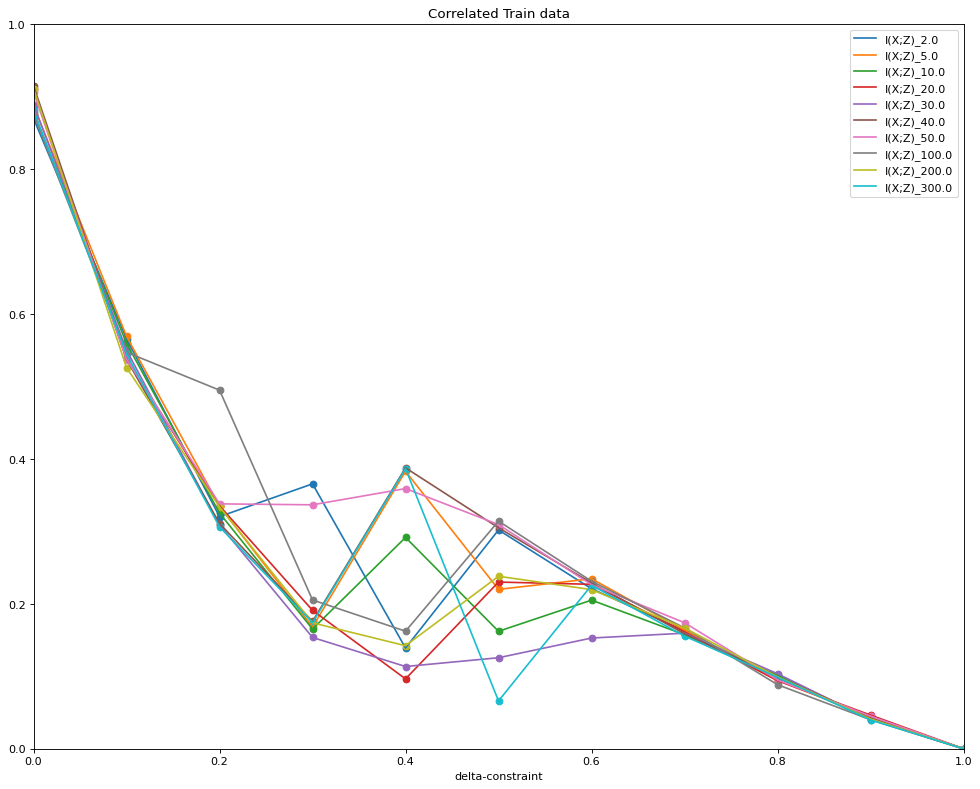

In [408]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

alphas = np.unique(train_uncorrelated_alpha_df['alpha'].to_numpy())#.astype(np.float32).astype(np.int16)
alphas = np.sort(alphas)

def plot_for_all_alphas(df, name):
    for alpha in alphas[:-2]:
        subframe = df[df['alpha'] == alpha]
        plot_privacy_utility_tradeoff_alphas(plt, subframe, name, str(alpha))

plot_for_all_alphas(train_correlated_alpha_df, 'Correlated Train')
plt.savefig('binary_alpha_plots_correlated_train.png')

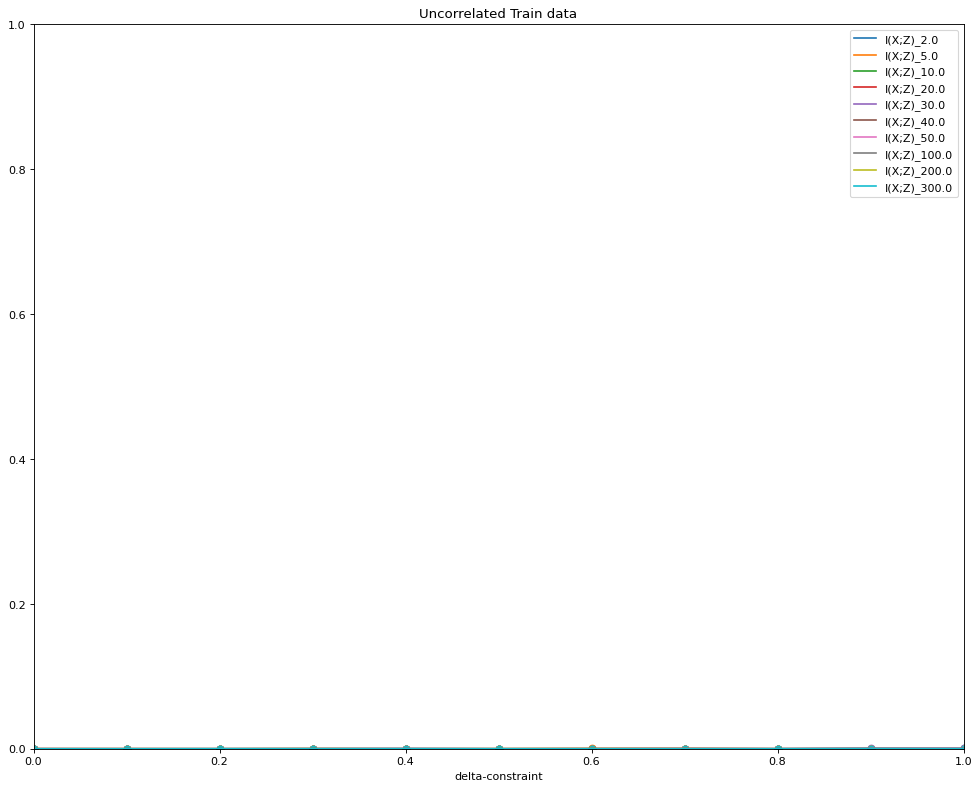

In [409]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

plot_for_all_alphas(train_uncorrelated_alpha_df, 'Uncorrelated Train')
plt.savefig('binary_alpha_plots_uncorrelated_train.png')

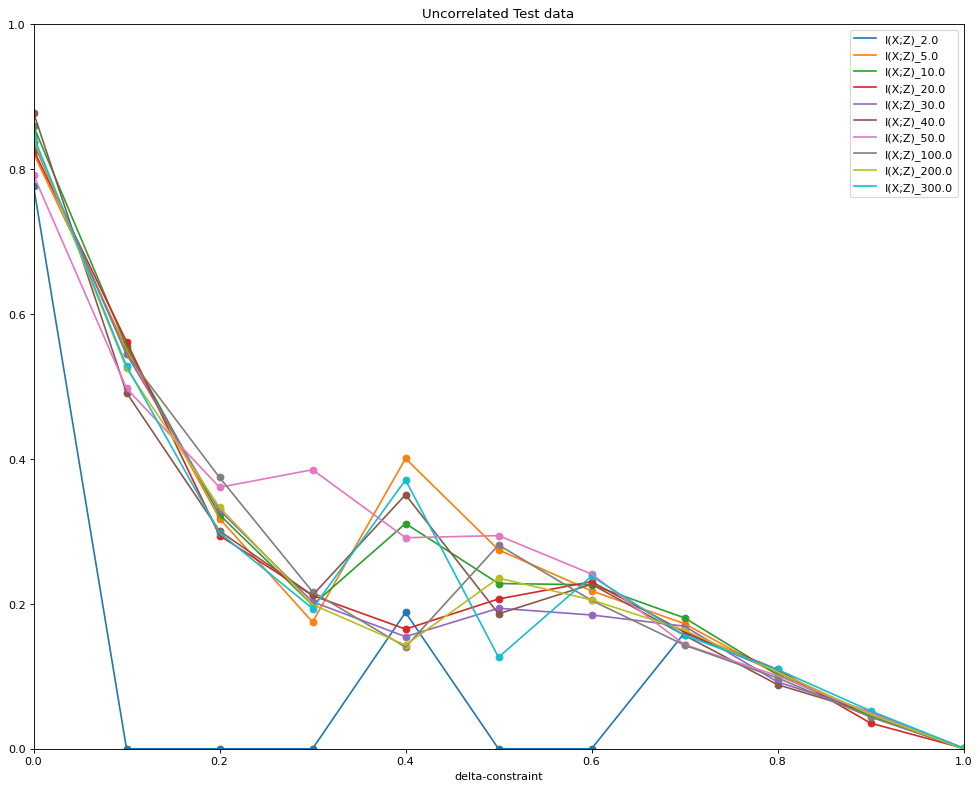

In [410]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

plot_for_all_alphas(test_uncorrelated_alpha_df, 'Uncorrelated Test')
plt.savefig('binary_alpha_plots_unorrelated_test.png')

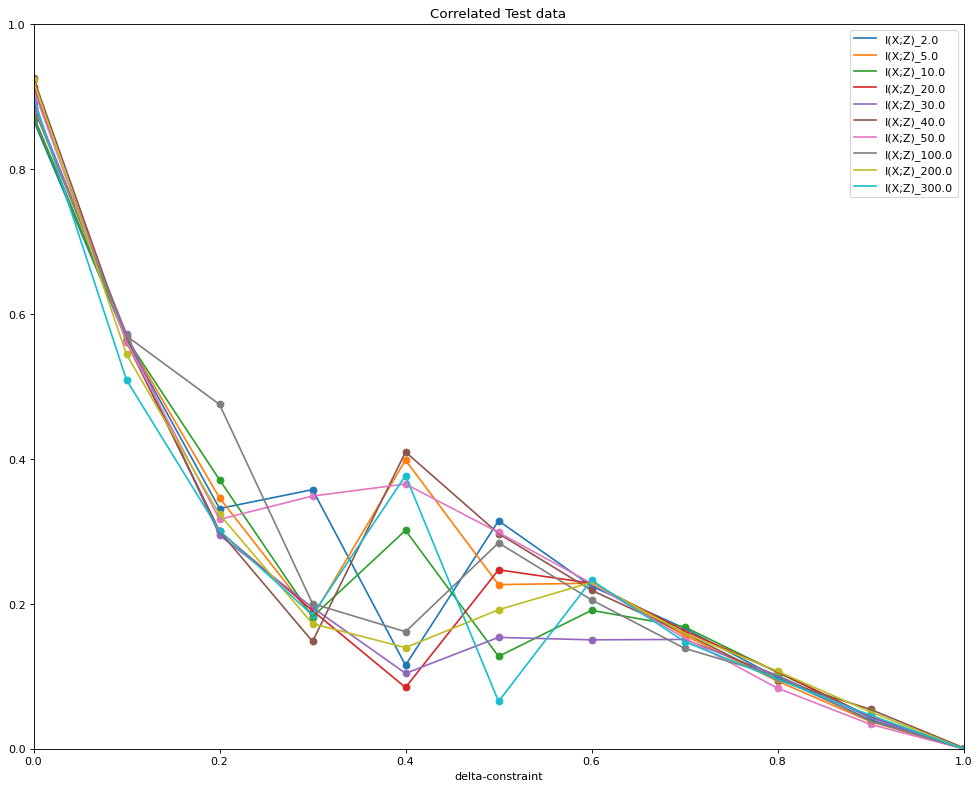

In [411]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

plot_for_all_alphas(test_correlated_alpha_df, 'Correlated Test')
plt.savefig('binary_alpha_plots_correlated_test.png')